<a href="https://colab.research.google.com/github/DanyelMorales/MLLearneerRepo/blob/main/2.-Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

x1,x2,y,x3 = np.loadtxt("https://raw.githubusercontent.com/DanyelMorales/MLLearneerRepo/main/dataset/police.txt",skiprows=1, unpack=True, dtype=np.float64)
bias=np.ones(x1.size, dtype=np.float64)
X = np.column_stack((bias,x1, x2, x3))
Y = y.reshape(-1, 1)
print(f"Xshape={X.shape} yshape={y.shape} Yshape={Y.shape}")


Xshape=(30, 4) yshape=(30,) Yshape=(30, 1)


In [2]:
print(f"x={X.dtype} y={Y.dtype} ")

x=float64 y=float64 


In [3]:
def forward(X,w):
  return sigmoid(np.matmul(X,w))

In [4]:
def gradient(X,Y,w):
  error=forward(X,w) - Y
  return np.matmul(X.T, (error)) / X.shape[0]

In [5]:
def train(X,Y, iterations, lr):
  w=np.zeros((X.shape[1], 1), dtype=np.float64)
  for i in range(iterations):
    print(f"iteration {i} => loss {mse_loss(X,Y,w)}")
    w -= gradient(X, Y, w) * lr
  return w

In [6]:
def sigmoid(z):
  return 1/ (1 + np.exp(-z))

In [7]:
def classify(X,w):
  return np.round(forward(X,w))

In [ ]:
def test(X,Y,w):
  total_examples = X.shape[0]
  correct_results = np.sum(classify(X,w) == Y)
  success_pct = correct_results * 100 / total_examples
  print(f"Success: {correct_results} {total_examples} {success_pct}")

In [8]:
def mse_loss(X,Y,w):
  return np.average((forward(X,w) - Y) ** 2)

In [9]:
def log_loss(X,Y,w):
  y_hat = forward(X,w)
  first_term = Y * np.log(y_hat)
  second_term = (1 - Y) * np.log(1 - y_hat)
  return -np.average(first_term + second_term)

In [10]:
def prepare_axes():
    ax = plt.figure().add_subplot(projection = '3d')
    ax.clear()
    ax.set_zticklabels(())
    ax.set_xlabel("w1", labelpad=15, fontsize=30)
    ax.set_ylabel("w2", labelpad=15, fontsize=30)
    ax.set_zlabel("Loss", labelpad=15, fontsize=30)
    ax.view_init(30, 120)
    return ax

TypeError: log_loss() missing 2 required positional arguments: 'Y' and 'w'

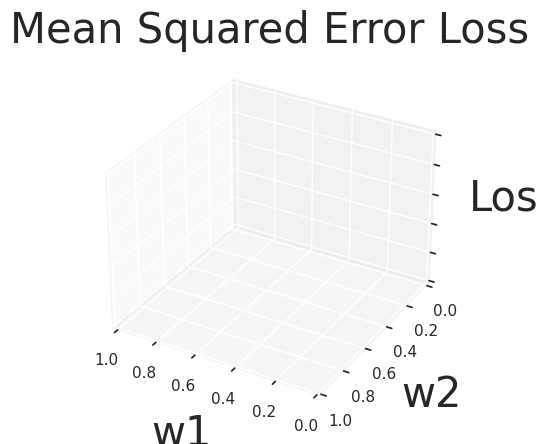

In [11]:
# Come up with some plausible data
n_examples = 20
np.random.seed(1234)
X = np.random.rand(n_examples, 2)
w = [1.23, 2.34]
Y = np.dot(X, w)
Y_binary = np.greater_equal(Y, np.median(Y)).astype(int)

# Prepare plot
MESH_SIZE = 400
sns.set(rc={"axes.facecolor": "white", "figure.facecolor": "white"})

# Plot mean squared error loss
ax = prepare_axes()
plt.title("Mean Squared Error Loss", fontsize=30)
view_range = 100    # Wide range to see the creeks and valleys
W1, W2 = np.meshgrid(np.linspace(-view_range, view_range, MESH_SIZE),
                     np.linspace(-view_range, view_range, MESH_SIZE))
losses = np.array([log_loss(X, Y_binary, [w1, w2]) for w1, w2
                   in zip(np.ravel(W1), np.ravel(W2))])
L = losses.reshape((MESH_SIZE, MESH_SIZE))
ax.plot_surface(W1, W2, L, cmap=cm.autumn, edgecolors='black',
                vmax=np.max(L), linewidth=0.2, antialiased=True)
plt.ion()
plt.show()
input("Press <Enter>...")

# Plot logarithmic loss
ax = prepare_axes()
plt.title("Log Loss", fontsize=30)
view_range = 20    # Tight range to avoid overflows
W1, W2 = np.meshgrid(np.linspace(-view_range, view_range, MESH_SIZE),
                     np.linspace(-view_range, view_range, MESH_SIZE))
losses = np.array([sigmoid(X, Y_binary, [w1, w2]) for w1, w2 in
                   zip(np.ravel(W1), np.ravel(W2))])
L = losses.reshape((MESH_SIZE, MESH_SIZE))
ax.plot_surface(W1, W2, L, cmap=cm.autumn, edgecolors='black',
                vmax=np.max(L), linewidth=0.2, antialiased=True)
plt.show()
input("Enter to exit...")


In [ ]:
w = train(X,Y, iterations=100_000, lr=0.00001)
test(X,Y,w)

In [ ]:
print(f"weights:{w.T}")
print(f"Water rate Predictions:")
pdWeights = []
for i in range(5):
  prediction={}
  prediction["prediction"] = forward(X[i], w)[0]
  prediction["label"] =Y[i][0]
  print(f"X[{i}] -> {prediction.get('prediction')} (label:{prediction['label']})")
  pdWeights.append(prediction)

In [ ]:
import pandas as pd
df = pd.DataFrame(pdWeights)
df

In [ ]:
import pandas as pd
df = pd.DataFrame(w.reshape(1,4), columns=["bias", "Pollution","Healthcare","Life expectancy"])
df

In [ ]:
import matplotlib.pyplot as plt

df.plot(kind="bar")
plt.title("Weights")
plt.show()